This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: classification and regression

## Classifying movie reviews: a binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\davidd\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\davidd\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0] # 0 stands for negative and 1 stands for positive
# the train_data is a list of word indices (encoding a sequence of words)

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
min([min(sequence) for sequence in train_data])

1

**Decoding reviews back to text**

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(14, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

The intermediate layers will use relu as their activation function, and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1": how likely the review is to be positive. A relu (rectified linear unit) is a function meant to zero out negative values, whereas a sigmoid "squashes" arbitrary values into the ```[0,1]``` interval, outputting something that can be interpreted as a probability. 

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function. relu is the most popular activation function in deep learning, but there are many other candidates, which all come with similarly strange names: prelu, elu, and so on.

**Compiling the model**

Finally, you need to choose a loss function and an optimizer. Because you're facing a binary classification problem and the output of your network is a probablity (you end your network with a single-unit layer with a sigmoid activation), it's best to use the **binary_crossentropy** loss. It isn't the only viable choice: you could use, for instance, **mean_squared_error**. But crossentropy is usually the best choice when you're dealing wtih models that output probablities. _Crossentropy_ is a quantity from the field of Information Theory that measures the distnace between probability distributions orm in this case, between the ground-truth distibution and your predictions. 

Here's the step where you configure the model with the **rmsprop** optimizer and the **binary_crossentropy** loss function. Note that you'll also monitor accuracy during training.

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

You're passing your optimizer, loss function, and metrics as strings, which is possible because **rmsprop**, **binary_crossentropy**, and **accuracy** are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer or **pass a custom loss function or metric function. The former can be done by passing an optimizer class instance as the optimizer argument, as shown in listing 3.5; the latter can be done by passing function objects as the loss and/or metrics arguments, as show in listing 3.5**

### Validating your approach

In [13]:
x_train.shape

(25000, 10000)

**Setting aside a validation set**

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [16]:
from datetime import datetime
start = datetime.now()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=2,
                    validation_data=(x_val, y_val))
end = datetime.now()
print(end -start)

Epoch 1/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0918 - accuracy: 0.9743 - val_loss: 0.8051 - val_accuracy: 0.8785
Epoch 2/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1185 - accuracy: 0.9714 - val_loss: 0.7230 - val_accuracy: 0.8822
Epoch 3/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1197 - accuracy: 0.9684 - val_loss: 0.6216 - val_accuracy: 0.8779
Epoch 4/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1277 - accuracy: 0.9679 - val_loss: 0.7300 - val_accuracy: 0.8786
Epoch 5/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1321 - accuracy: 0.9680 - val_loss: 0.7658 - val_accuracy: 0.8783
Epoch 6/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1446 - accuracy: 0.9674 - val_loss: 0.8026 - val_accuracy: 0.8763
Epoch 7/10
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1393 - accuracy: 0.9677 - val_loss: 0.8825 - val_ac

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

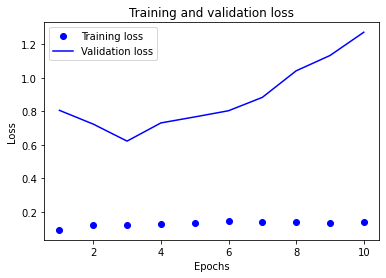

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

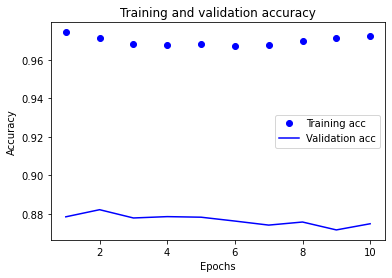

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As you can see, the training loss decreases with every eoch, and the training accuracy increases with every epoch. That's what you would expect when running gradient-descent optimization - the quantity you're trying to minimize should be less with every iteration. But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example fo what we warned against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before. In precise terms, what you're seeing is _overfitting_: after the second epoch, you're overoptimizing on the training data, and you end up learning representations that are specific to the training data and don't generalize to data outside of the training set.

In this case, to prevent overfitting, you could stop training after three epochs. In general, you can use a range of techniques to mitigate overfitting, which we'll cover later. 

Let's train a new network from scratch for four epochs and then evalute it on the test data.

**Retraining a model from scratch**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=16)
results = model.evaluate(x_test, y_test)

Epoch 1/4
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3153 - accuracy: 0.8712
Epoch 2/4
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2179 - accuracy: 0.9163
Epoch 3/4
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1919 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 1s 910us/step - loss: 0.3164 - accuracy: 0.8844


In [21]:
results

[0.31644323468208313, 0.8843600153923035]

This fairly naive approach achieves an accuracy of 88%. With SOTA approaches, you should be able to get close to 95%.

### Using a trained model to generate predictions on new data

In [22]:
model.predict(x_test)

array([[0.08987561],
       [0.99992573],
       [0.98327047],
       ...,
       [0.16351113],
       [0.05437252],
       [0.42116553]], dtype=float32)

### Further experiments

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.003),
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=12,
                    validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3497 - accuracy: 0.8529 - val_loss: 0.2773 - val_accuracy: 0.8865
Epoch 2/20
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2190 - accuracy: 0.9173 - val_loss: 0.2857 - val_accuracy: 0.8887
Epoch 3/20
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1809 - accuracy: 0.9335 - val_loss: 0.3429 - val_accuracy: 0.8824
Epoch 4/20
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1593 - accuracy: 0.9443 - val_loss: 0.3512 - val_accuracy: 0.8861
Epoch 5/20
1250/1250 [==============================] - 2s 1ms/step - loss: 0.1397 - accuracy: 0.9513 - val_loss: 0.3589 - val_accuracy: 0.8783
Epoch 6/20
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1209 - accuracy: 0.9597 - val_loss: 0.3995 - val_accuracy: 0.8806
Epoch 7/20
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1032 - accuracy: 0.9670 - val_loss: 0.5423 - val_accuracy:

In [24]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [25]:
partial_x_train.shape

(15000, 10000)

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1512,
                    validation_data=(x_val, y_val))


Epoch 1/20
10/10 [==============================] - 1s 53ms/step - loss: 0.0311 - accuracy: 0.9909 - val_loss: 1.4963 - val_accuracy: 0.8485
Epoch 2/20
10/10 [==============================] - 0s 33ms/step - loss: 0.0226 - accuracy: 0.9919 - val_loss: 1.4976 - val_accuracy: 0.8464
Epoch 3/20
10/10 [==============================] - 0s 26ms/step - loss: 0.0202 - accuracy: 0.9926 - val_loss: 1.4979 - val_accuracy: 0.8441
Epoch 4/20
10/10 [==============================] - 0s 28ms/step - loss: 0.0189 - accuracy: 0.9930 - val_loss: 1.5322 - val_accuracy: 0.8421
Epoch 5/20
10/10 [==============================] - 0s 36ms/step - loss: 0.0177 - accuracy: 0.9934 - val_loss: 1.5800 - val_accuracy: 0.8417
Epoch 6/20
10/10 [==============================] - 0s 26ms/step - loss: 0.0169 - accuracy: 0.9937 - val_loss: 1.5536 - val_accuracy: 0.8407
Epoch 7/20
10/10 [==============================] - 0s 29ms/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 1.6185 - val_accuracy: 0.8398
Epoch 8/20
10

### Wrapping up


Here's what you should take away from this example:

* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it - as tensors - into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
* Stacks of Dense layers with **relu** activations can solve a wide range of problems (including sentiment classification), and you'll likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output on a binary classifcation problem, the loss function you should use is **binary_crossentropy**.
* The **rmsprop** optimizer is generally a good enough choice, whatever your problem. That's one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they've never seen before. Be sure to always monitor performance on data that is outside of the training set.

## Classifying newswires: a multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

**Plotting the training and validation loss**

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

### Further experiments

### Wrapping up

## Predicting house prices: a regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Chapter summary